<a href="https://colab.research.google.com/github/DebadityaShome/Deep-learning-practice/blob/main/PyTorch/tutorials/MNIST_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms

In [13]:
dataset = MNIST(root="data/", download=True, train=True, transform=transforms.ToTensor())

In [14]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label) # shape -> (channels, height, width)

torch.Size([1, 28, 28]) 5


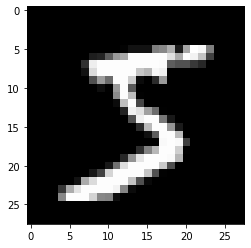

In [18]:
plt.imshow(img_tensor[0, :, :], cmap='gray')

In [21]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [23]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model


*   Logistic regression model is almost similar to a linear regression one. It contains weights and bias matrices, and output is obtained using simple matrix operations. (`pred = x @ w.t() + b`)
*   We can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.
*   Since `nn.Linear` expects a vector as input, each image is flattened to a 784 dimension vector.
* Output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e, 0 to 9). The predicted label for an image is simply the one with highest probability.



In [25]:
input_size = 28*28
num_classes = 10

# Logistic Regression
model = nn.Linear(input_size, num_classes)

In [26]:
print(model.weight.shape)

torch.Size([10, 784])


In [29]:
model.weight.shape, model.weight

(torch.Size([10, 784]), Parameter containing:
 tensor([[-0.0323,  0.0088,  0.0042,  ...,  0.0185,  0.0301, -0.0286],
         [ 0.0346,  0.0248, -0.0088,  ..., -0.0176, -0.0061, -0.0291],
         [ 0.0267,  0.0171,  0.0354,  ..., -0.0156, -0.0312, -0.0098],
         ...,
         [-0.0299, -0.0222, -0.0231,  ..., -0.0346,  0.0088,  0.0127],
         [-0.0092,  0.0207,  0.0152,  ...,  0.0045, -0.0240,  0.0240],
         [-0.0205, -0.0242, -0.0088,  ..., -0.0189,  0.0132,  0.0124]],
        requires_grad=True))

In [30]:
model.bias.shape, model.bias

(torch.Size([10]), Parameter containing:
 tensor([-0.0139, -0.0045,  0.0170,  0.0322,  0.0167,  0.0249, -0.0353, -0.0016,
         -0.0035,  0.0093], requires_grad=True))

In [35]:
class MnistModel(nn.Module):
    """
    __init__ constructor: Initializes the weights and biases using nn.Linear
    forward method: It is invoked when we pass a batch of inputs to the model, 
    """
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [36]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 9, 5, 6, 0, 0, 6, 8, 1, 1, 3, 6, 6, 2, 9, 6, 3, 5, 8, 9, 3, 0, 3, 6,
        6, 4, 8, 1, 1, 7, 6, 1, 6, 5, 7, 9, 4, 7, 7, 1, 3, 3, 0, 4, 9, 3, 0, 1,
        0, 3, 4, 6, 5, 1, 4, 8, 0, 9, 7, 1, 3, 9, 7, 2, 1, 7, 0, 0, 7, 0, 4, 9,
        5, 4, 5, 1, 6, 2, 9, 1, 3, 1, 4, 1, 4, 6, 6, 3, 0, 7, 8, 9, 1, 3, 3, 5,
        7, 2, 4, 0, 9, 4, 0, 7, 1, 6, 6, 8, 3, 2, 6, 3, 8, 5, 0, 6, 6, 4, 0, 1,
        1, 0, 4, 5, 7, 5, 0, 4])
torch.Size([128, 1, 28, 28])
tensor([[ 0.0313,  0.0651, -0.0715,  ..., -0.1474, -0.1087,  0.0826],
        [-0.0683, -0.2897, -0.1437,  ...,  0.0058, -0.1568,  0.1429],
        [ 0.0422, -0.1911, -0.0039,  ...,  0.0202, -0.2929,  0.1849],
        ...,
        [-0.1234, -0.1638, -0.1421,  ...,  0.0260, -0.3933, -0.0074],
        [ 0.3366, -0.1612, -0.1074,  ...,  0.6068,  0.1386,  0.3147],
        [-0.0038, -0.0777, -0.0602,  ..., -0.0015, -0.1470,  0.2202]],
       grad_fn=<AddmmBackward>)


In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0281, -0.0172, -0.0180,  ..., -0.0101,  0.0041,  0.0103],
         [ 0.0131,  0.0339, -0.0191,  ..., -0.0128, -0.0131,  0.0041],
         [ 0.0053,  0.0205, -0.0130,  ...,  0.0122,  0.0005, -0.0243],
         ...,
         [-0.0259,  0.0125, -0.0083,  ..., -0.0302,  0.0006, -0.0020],
         [-0.0283,  0.0027, -0.0205,  ...,  0.0189,  0.0243, -0.0085],
         [ 0.0210,  0.0186, -0.0023,  ...,  0.0014, -0.0202, -0.0011]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0098, -0.0243,  0.0312, -0.0104, -0.0176,  0.0104,  0.0291,  0.0175,
         -0.0075,  0.0226], requires_grad=True)]

In [43]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1091, 0.1129, 0.0985, 0.0981, 0.0719, 0.1031, 0.1054, 0.0913, 0.0949,
         0.1149],
        [0.1004, 0.0805, 0.0931, 0.0856, 0.1029, 0.1018, 0.1118, 0.1081, 0.0919,
         0.1240]])
Sum:  1.0


In [46]:
# max_probs are the maximum probabilities of labels per image
# preds are the indexes of the max probabilities
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 9, 9, 7, 0, 7, 0, 0, 6, 7, 9, 6, 0, 5, 7, 5, 5, 9, 9, 5, 7, 7, 1,
        9, 0, 0, 6, 0, 9, 7, 6, 9, 5, 3, 0, 0, 3, 1, 0, 8, 6, 0, 0, 1, 5, 0, 6,
        7, 7, 5, 9, 9, 5, 9, 7, 3, 7, 7, 6, 8, 9, 6, 0, 0, 9, 7, 7, 0, 0, 6, 9,
        5, 0, 5, 6, 9, 6, 6, 4, 7, 6, 3, 9, 1, 9, 6, 7, 5, 3, 5, 6, 0, 7, 1, 0,
        4, 3, 3, 0, 2, 9, 0, 3, 0, 0, 7, 9, 7, 1, 9, 7, 0, 7, 0, 7, 9, 9, 0, 1,
        6, 0, 2, 5, 9, 7, 7, 9])
tensor([0.1149, 0.1240, 0.1231, 0.1233, 0.1292, 0.1406, 0.1316, 0.1309, 0.1247,
        0.1283, 0.1159, 0.1293, 0.1230, 0.1317, 0.1255, 0.1274, 0.1330, 0.1215,
        0.1268, 0.1675, 0.1442, 0.1484, 0.1292, 0.1211, 0.1187, 0.1353, 0.1262,
        0.1406, 0.1357, 0.1340, 0.1164, 0.1414, 0.1258, 0.1348, 0.1323, 0.1252,
        0.1203, 0.1120, 0.1151, 0.1110, 0.1251, 0.1166, 0.1657, 0.1365, 0.1312,
        0.1393, 0.1276, 0.1219, 0.1333, 0.1230, 0.1280, 0.1348, 0.1407, 0.1144,
        0.1228, 0.1278, 0.1349, 0.1288, 0.1303, 0.1146, 0.1214, 0.1183, 0.1285,
       

In [47]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [48]:
accuracy(outputs, labels)

tensor(0.1719)

In [49]:
loss_fn = F.cross_entropy

In [50]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2779, grad_fn=<NllLossBackward>)


In [62]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):

        # Training phase
        for batch in train_loader:

            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [63]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [64]:
# Final version
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean() # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [65]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.04202927276492119, 'val_loss': 2.3444883823394775}

In [66]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9763, val_acc: 0.6027
Epoch [1], val_loss: 1.7041, val_acc: 0.7122
Epoch [2], val_loss: 1.5008, val_acc: 0.7465
Epoch [3], val_loss: 1.3473, val_acc: 0.7726
Epoch [4], val_loss: 1.2291, val_acc: 0.7906


In [67]:
history2 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7640, val_acc: 0.8407
Epoch [1], val_loss: 0.6285, val_acc: 0.8566
Epoch [2], val_loss: 0.5609, val_acc: 0.8635
Epoch [3], val_loss: 0.5197, val_acc: 0.8709
Epoch [4], val_loss: 0.4909, val_acc: 0.8757


In [68]:
history3 = fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3907, val_acc: 0.8938
Epoch [1], val_loss: 0.3578, val_acc: 0.8997
Epoch [2], val_loss: 0.3414, val_acc: 0.9032
Epoch [3], val_loss: 0.3307, val_acc: 0.9077
Epoch [4], val_loss: 0.3234, val_acc: 0.9085


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

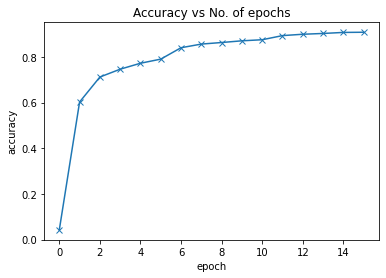

In [69]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

In [71]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

In [73]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted:  7


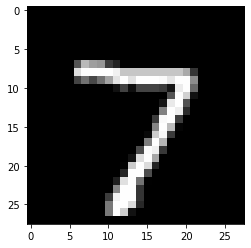

In [74]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted: ', predict_image(img, model))

In [75]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9161132574081421, 'val_loss': 0.29895249009132385}

### Saving and loading models

In [76]:
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [77]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0349, -0.0207,  0.0320,  ..., -0.0129,  0.0137, -0.0168],
                      [ 0.0152, -0.0249, -0.0095,  ..., -0.0005, -0.0145, -0.0038],
                      [-0.0049,  0.0175, -0.0065,  ...,  0.0262,  0.0153, -0.0306],
                      ...,
                      [ 0.0227,  0.0330,  0.0263,  ...,  0.0017,  0.0283,  0.0204],
                      [-0.0160, -0.0162, -0.0253,  ..., -0.0125,  0.0015,  0.0084],
                      [ 0.0203, -0.0297, -0.0031,  ..., -0.0306, -0.0345,  0.0116]])),
             ('linear.bias',
              tensor([-0.2341,  0.2888,  0.0385, -0.1928,  0.0629,  0.7643, -0.0353,  0.3480,
                      -0.9310, -0.1346]))])

In [78]:
# Initialize a new model
new_model = MnistModel()

evaluate(new_model, test_loader)

{'val_acc': 0.10810546576976776, 'val_loss': 2.3097784519195557}

In [80]:
new_model.load_state_dict(torch.load('mnist_logistic.pth'))
new_model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0349, -0.0207,  0.0320,  ..., -0.0129,  0.0137, -0.0168],
                      [ 0.0152, -0.0249, -0.0095,  ..., -0.0005, -0.0145, -0.0038],
                      [-0.0049,  0.0175, -0.0065,  ...,  0.0262,  0.0153, -0.0306],
                      ...,
                      [ 0.0227,  0.0330,  0.0263,  ...,  0.0017,  0.0283,  0.0204],
                      [-0.0160, -0.0162, -0.0253,  ..., -0.0125,  0.0015,  0.0084],
                      [ 0.0203, -0.0297, -0.0031,  ..., -0.0306, -0.0345,  0.0116]])),
             ('linear.bias',
              tensor([-0.2341,  0.2888,  0.0385, -0.1928,  0.0629,  0.7643, -0.0353,  0.3480,
                      -0.9310, -0.1346]))])

In [81]:
evaluate(new_model, test_loader)

{'val_acc': 0.9161132574081421, 'val_loss': 0.29895249009132385}